# Comparison of single-site MCMC and Wolff model - results

To make sure that we implemented the Wolff algorithm properly, here we compare some statistics obtained at different grid sizes and temperatures.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from ising_common_procedures import *
from tqdm import tqdm

plot_colors=['tab:blue','tab:orange','tab:green','tab:red']

## Exact functions for the 2D infinite Ising grid

These are used to further validate the simulation results.

In [2]:
# exact mean absolute magnetization
def exactMeanAbsoluteM(beta):
    if (beta_c>=beta):
        return 0
    else:
        return (1-1/np.sinh(2*beta)**4)**(1/8)
# exact mean energy per site
def exactAverageE(beta,j):
    tanh=np.tanh(2*beta*j)
    cosh=np.cosh(2*beta*j)
    return -j/tanh*(1+2/np.pi*(2*tanh*tanh-1)*scipy.special.ellipk(4*tanh*tanh/cosh/cosh))

## Absolute magnetization at different grid sizes

100%|██████████| 4/4 [00:50<00:00, 12.65s/it]


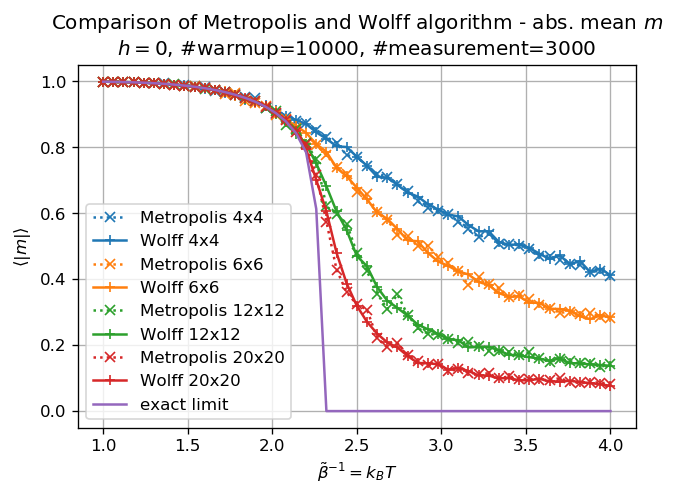

In [12]:
fig_abs_m, ax=plt.subplots(1,1,dpi=120)
# constants
num_points=51
num_warmup=10000
num_meas=3000
# output array for cluster size, magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
beta_inv_values=np.linspace(1,4,num_points)
# calculate and plot
for i,n in enumerate(tqdm([4,6,12,20])):
    # data to plot
    res_mcmc=[]
    res_wolff=[]
    for beta_inv in beta_inv_values:
        beta=1/beta_inv
        # init random config
        arr=init_grid((n,n))
        # warm up
        metropolis_hastings_sweep(arr, beta,1, num_warmup)
        # measure
        metropolis_hastings_measurement(arr, beta,1,m_result,e_result)
        # append magnetization to plot data
        res_mcmc+=[np.average(np.abs(m_result,m_result))/n/n]
        # init random config
        arr=init_grid((n,n))
        # warm up
        wolff_step(arr, beta, 1, num_warmup)
        # measure
        wolff_measurement(arr, beta,1,cluster_result,m_result)
        # append magnetization to plot data
        res_wolff+=[np.average(np.abs(m_result,m_result))/n/n]
    ax.plot(beta_inv_values,res_mcmc,label=f'Metropolis {n}x{n}',linestyle=":",color=plot_colors[i],marker='x')
    ax.plot(beta_inv_values,res_wolff,label=f'Wolff {n}x{n}',color=plot_colors[i],marker='+')
# add exact result
ax.plot(beta_inv_values,[exactMeanAbsoluteM(beta) for beta in beta_inv_values**(-1)],label='exact limit',color='tab:purple')
ax.set_xlabel(r'$\tilde\beta^{-1}=k_B T$')
ax.set_ylabel(r'$\langle|m|\rangle$')
ax.set_title(f'Comparison of Metropolis and Wolff algorithm - abs. mean $m$\n$h=0$, #warmup={num_warmup}, #measurement={num_meas}')
ax.legend()
ax.grid()

In [13]:
fig_abs_m.savefig('images/comparison-absolute-mean-m.png')

## Magnetization at different grid sizes

Since the external field is zero, any configuration of a finite grid has the same probability as the completely flipped configuration. Therefore, the magnetization is exactly zero at all temperatures.

### Metropolis algorithm

100%|██████████| 4/4 [00:26<00:00,  6.55s/it]


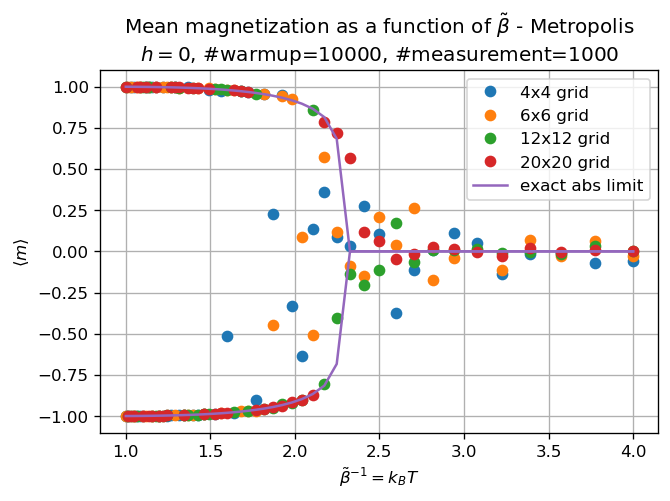

In [15]:
fig_m_mcmc, ax=plt.subplots(1,1,dpi=120)
# constants
num_points=51
num_warmup=10000
num_meas=1000
# output array for magnetic moment and energy
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
beta_values=np.linspace(0.25,1,num_points)
# calculate and plot
for i,n in enumerate(tqdm([4,6,12,20])):
    # data to plot
    res_mcmc=[]
    for beta in beta_values:
        # init random config
        arr=init_grid((n,n))
        # warm up
        metropolis_hastings_sweep(arr, beta,1, num_warmup)
        # measure
        metropolis_hastings_measurement(arr, beta,1, m_result,e_result)
        # append magnetization to plot data
        res_mcmc+=[np.average(m_result)/n/n]
    ax.plot(beta_values**(-1),res_mcmc,ls=' ',label=f'{n}x{n} grid',color=plot_colors[i],marker='o')
# add exact result
ax.plot(beta_values**(-1),[exactMeanAbsoluteM(beta) for beta in beta_values],label='exact abs limit',color='tab:purple')
ax.plot(beta_values**(-1),[-exactMeanAbsoluteM(beta) for beta in beta_values],color='tab:purple')
ax.set_xlabel(r'$\tilde\beta^{-1}=k_B T$')
ax.set_ylabel(r'$\langle m\rangle$')
ax.set_title(r'Mean magnetization as a function of $\tilde\beta$ - Metropolis'+f'\n$h=0$, #warmup={num_warmup}, #measurement={num_meas}')
ax.legend()
ax.grid()

As we see, at small temperature the grid is "frozen" into one state.

In [16]:
fig_m_mcmc.savefig('images/comparison-mean-m-mcmc.png')

### Wolff algorithm

100%|██████████| 4/4 [00:15<00:00,  3.81s/it]


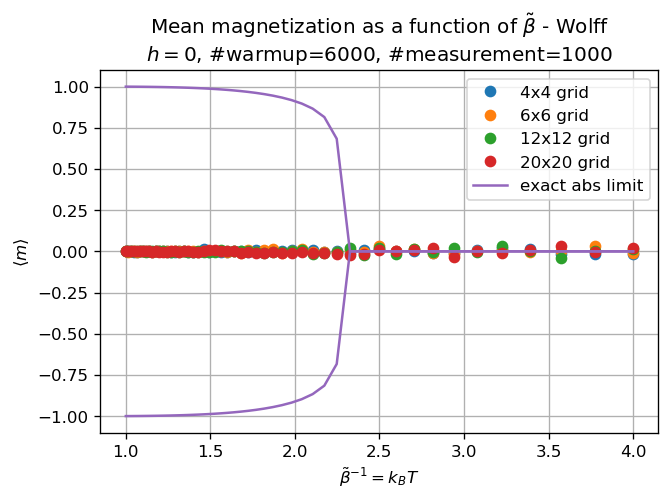

In [19]:
fig_m_wolff, ax=plt.subplots(1,1,dpi=120)
# constants
num_points=51
num_warmup=6000
num_meas=1000
# output array for cluster size, magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
beta_values=np.linspace(0.25,1,num_points)
# calculate and plot
for i,n in enumerate(tqdm([4,6,12,20])):
    # data to plot
    res_wolff=[]
    for beta in beta_values:
        # init random config
        arr=init_grid((n,n))
        # warm up
        wolff_step(arr, beta, 1, num_warmup)
        # measure
        wolff_measurement(arr, beta, 1,cluster_result,m_result)
        # append magnetization to plot data
        res_wolff+=[np.average(m_result)/n/n]
    ax.plot(beta_values**(-1),res_wolff,ls=' ',label=f'{n}x{n} grid',color=plot_colors[i],marker='o')
# add exact result
ax.plot(beta_values**(-1),[exactMeanAbsoluteM(beta) for beta in beta_values],label='exact abs limit',color='tab:purple')
ax.plot(beta_values**(-1),[-exactMeanAbsoluteM(beta) for beta in beta_values],color='tab:purple')
ax.set_xlabel(r'$\tilde\beta^{-1}=k_B T$')
ax.set_ylabel(r'$\langle m\rangle$')
ax.set_title(r'Mean magnetization as a function of $\tilde\beta$ - Wolff'+f'\n$h=0$, #warmup={num_warmup}, #measurement={num_meas}')
ax.legend()
ax.grid()

In [20]:
fig_m_wolff.savefig('images/comparison-mean-m-wolff.png')

## Energy per site at different grid sizes

100%|██████████| 4/4 [00:42<00:00, 10.54s/it]


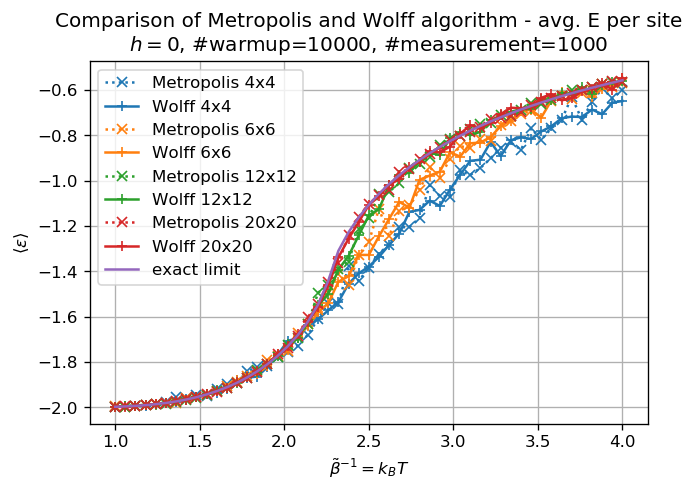

In [23]:
fig_e_per_site, ax=plt.subplots(1,1,dpi=120)
# constants
num_points=51
num_warmup=10000
num_meas=1000
# output array for magnetic moment and energy
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
cluster_result=np.zeros(num_meas)
beta_inv_values=np.linspace(1,4,num_points)
# calculate and plot
for i,n in enumerate(tqdm([4,6,12,20])):
    # data to plot
    res_mcmc=[]
    res_wolff=[]
    for beta_inv in beta_inv_values:
        beta=1/beta_inv
        # init random config
        arr=init_grid((n,n))
        # warm up
        metropolis_hastings_sweep(arr, beta,1, num_warmup)
        # measure
        metropolis_hastings_measurement(arr, beta,1, m_result,e_result)
        # append energy per site to plot data
        res_mcmc+=[np.average(e_result)/n/n]
        # init random config
        arr=init_grid((n,n))
        # warm up
        wolff_step(arr, beta,1, num_warmup)
        # measure
        wolff_measurement_full(arr, beta,1, cluster_result, m_result, e_result)
        # append energy per site to plot data
        res_wolff+=[np.average(e_result)/n/n]
    ax.plot(beta_inv_values,np.array(res_mcmc),label=f'Metropolis {n}x{n}',linestyle=":",color=plot_colors[i],marker='x')
    ax.plot(beta_inv_values,np.array(res_wolff),label=f'Wolff {n}x{n}',color=plot_colors[i],marker='+')
# add exact result
ax.plot(beta_inv_values,exactAverageE(beta_inv_values**(-1),1),label='exact limit',color='tab:purple')
ax.set_xlabel(r'$\tilde\beta^{-1}=k_B T$')
ax.set_ylabel(r'$\langle \epsilon\rangle$')
ax.set_title(f'Comparison of Metropolis and Wolff algorithm - avg. E per site\n$h=0$, #warmup={num_warmup}, #measurement={num_meas}')
ax.legend()
ax.grid()

In [25]:
fig_e_per_site.savefig('images/comparison-e-per-site.png')